In [1]:
from Supportingcode.Data_reader import Data
from Supportingcode.Algorithms import rescheduling_problem
import igraph

In [2]:
local = 'Data/Example/'
info = Data('Example', local, "edb")
tracks, stations, trains, current_time, maxtime = info.read_from_CSV()

In [3]:
# info.write_to_CSV()

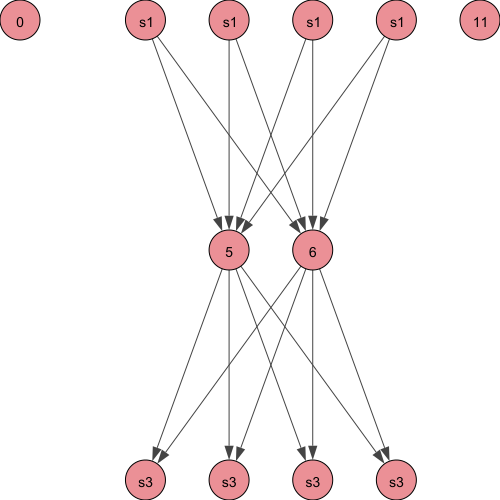

In [4]:
rescheduling = rescheduling_problem(tracks, stations, trains, current_time, maxtime, 'Example')
rescheduling.plot_graph(True)

Creating the data of the problem after the perturbation 

In this problem train 1 is delayed 1 second in track 1 creating the time table with a conflict

However the problem begins in time 7 so the data used is only after the current time

In [5]:
rescheduling.Current_time_adjust()

In [6]:
for train in trains.values():
    print('begin')
    print(f'job{train.id}',train.begin_schedule)
    print('end')
    print(f'job{train.id}',train.end_schedule)

begin
job1 {1: 6, 5: 9, 7: 10}
end
job1 {1: 10, 5: 11, 7: 14}
begin
job2 {1: 1, 5: 3, 7: 4}
end
job2 {1: 4, 5: 5, 7: 7}
begin
job3 {1: 14, 5: 16, 7: 17}
end
job3 {1: 17, 5: 18, 7: 21}
begin
job4 {1: 10, 5: 12, 7: 13}
end
job4 {1: 13, 5: 14, 7: 17}


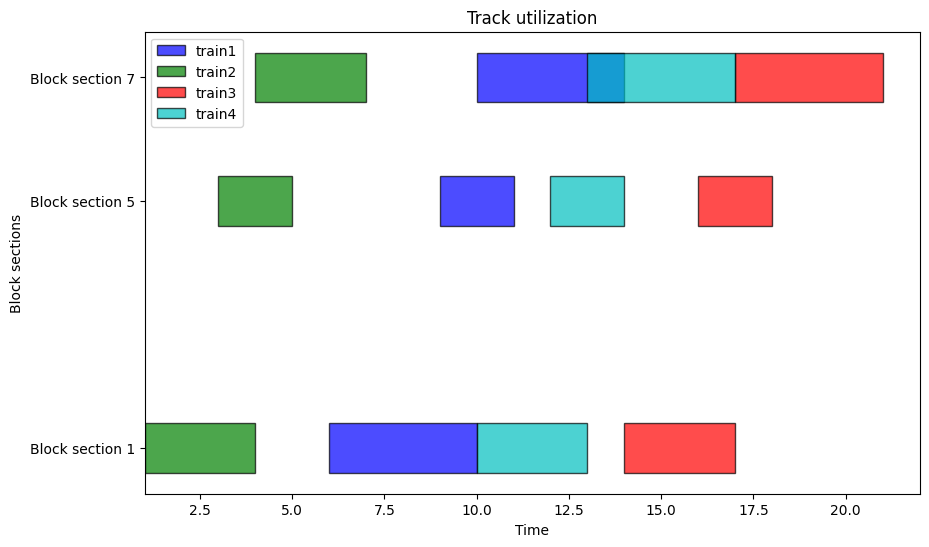

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Jobs = {
    'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
    'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
    'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
    'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
}

# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(Jobs['train1'].keys())
ax.set_yticks(resources)
ax.set_yticklabels([f'Block section {resource}' for resource in resources])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Track utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()


# Model 1

In [8]:
Fixedroute_reschedule1 = rescheduling.Model1()
Newtimetable1 = Fixedroute_reschedule1.times.extract_values()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 32 rows, 25 columns and 64 nonzeros
Model fingerprint: 0xbb63ce35
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+01]
Presolve removed 32 rows and 25 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.000000000e+00


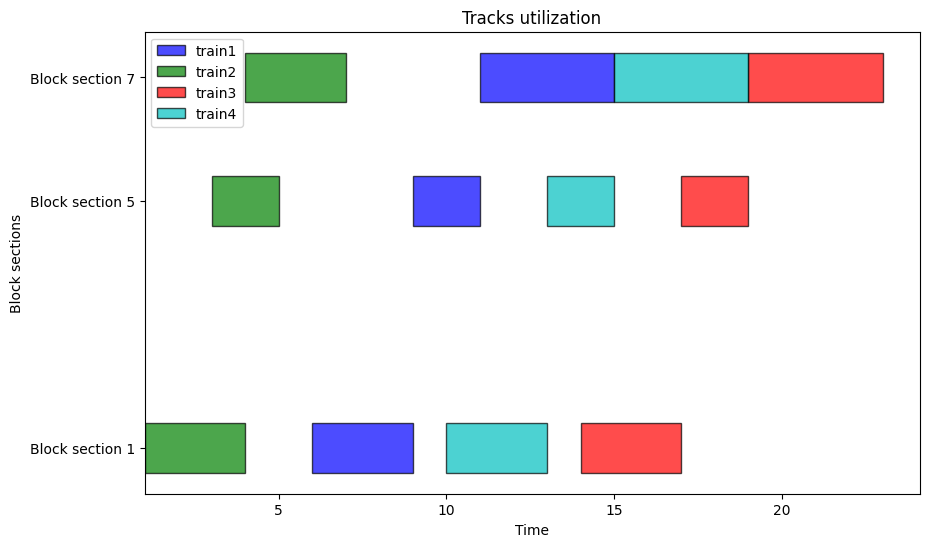

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
route = {}
schedulestart = {}
for k in Newtimetable1:
    if k[1] ==0:
        route[k[0]] =[0]
    else:
        route[k[0]].append(k[1])
        
# Jobs={f'train{k}': {route[k][i]: (Newtimetable1[k,route[k][i]],Newtimetable1[k,route[k][i+1]]) for i in range(1,len(route[k])-1)} for k in route}
for k in route:
    # print(route[k][len(route[k])-1], len(route[k])-1, route[k])
    for i in range(1,len(route[k])-2):
        Jobs[f'train{k}'][route[k][i]] = Newtimetable1[k,route[k][i]],Newtimetable1[k,route[k][i+1]]
    # print(Jobs[f'train{k}'])
    Jobs[f'train{k}'][route[k][len(route[k])-2]] = (Newtimetable1[k,route[k][len(route[k])-2]],Newtimetable1[k,route[k][len(route[k])-1]])
# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(Jobs['train1'].keys())
ax.set_yticks(resources)
ax.set_yticklabels([f'Block section {resource}' for resource in resources])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()

# Model 2

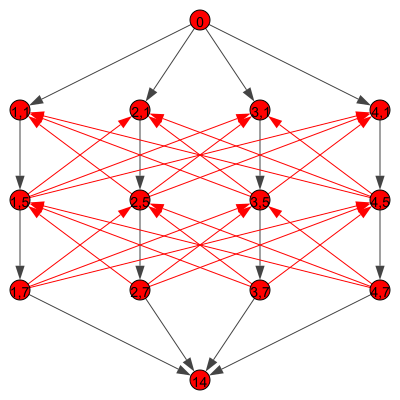

In [10]:
from igraph import Graph, plot

# Define the routes for each train
routes = {}
node=1
for i in range(4):
    for t in range(3):
        if t==0:
            routes[i] = [0,node]
        else:
            routes[i].append(node)
        node+=1
    routes[i].append(13)

label = [0]
for x in routes:
    for v in range(len(routes[x])):
        if v == 1:
            label.append(f'{x+1},1')
        if v==2:
            label.append(f'{x+1},5')
        if v==3:
            label.append(f'{x+1},7')
label.append(14)

layout = [
    (3, 0),
    (0, 2), (0, 4), (0, 6), 
    (2, 2), (2, 4), (2, 6), 
    (4, 2), (4, 4), (4, 6), 
    (6, 2), (6, 4), (6, 6),
    (3, 8)
]

alternatives =[]
for k in range(len(routes)):
    rest = list(range(len(routes)))
    rest.pop(k)
    for n in range(1,len(routes[k])-2):
        # print(k,n)
        for m in rest:
            alternatives.append((routes[m][n+1],routes[k][n]))
fixed = [(routes[k][v],routes[k][v+1])for k in routes for v in range(len(routes[k])-1)]

# print(fixed+alternatives)

# Create a directed graph
g = Graph(14, fixed ,directed=True)

for k in alternatives:
    g.add_edge(k[0],k[1],color = "red")

# print(g)
g.vs["layout"] = layout
g.vs['labels'] = label

plot(g, bbox=(400, 400), margin=20,vertex_label = g.vs['labels'], layout= g.vs["layout"])

In [11]:
Fixedroute_reschedule2 = rescheduling.Model2()
Newtimetable2 = Fixedroute_reschedule2.times.extract_values()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 43 rows, 36 columns and 108 nonzeros
Model fingerprint: 0xd105ab1c
Variable types: 25 continuous, 11 integer (11 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 6e+01]
Found heuristic solution: objective 9.0000000
Presolve removed 15 rows and 24 columns
Presolve time: 0.00s
Presolved: 28 rows, 12 columns, 60 nonzeros
Variable types: 10 continuous, 2 integer (2 binary)

Root relaxation: objective 5.000000e+00, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0  


Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+00, best bound 5.000000000000e+00, gap 0.0000%


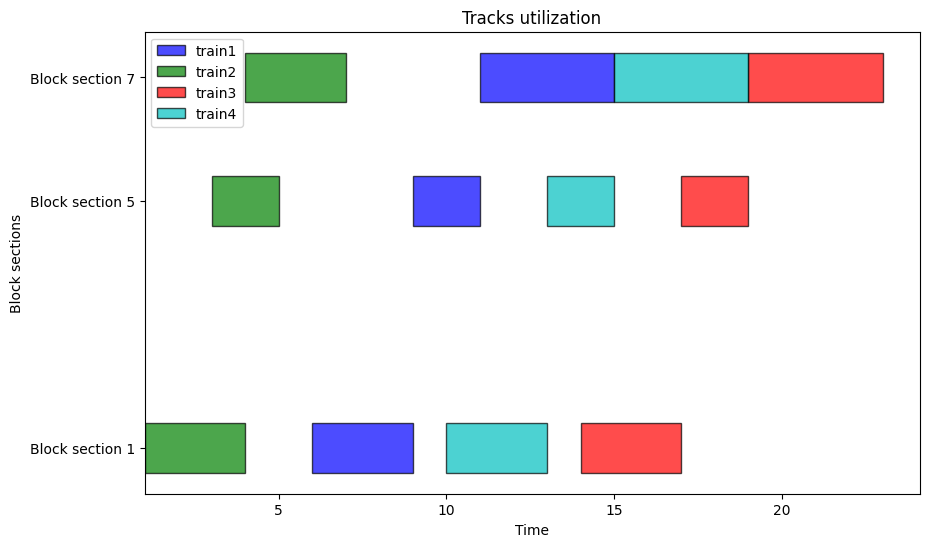

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
route = {}
schedulestart = {}
for k in Newtimetable2:
    if k[1] ==0:
        route[k[0]] =[0]
    else:
        route[k[0]].append(k[1])
        
# Jobs={f'train{k}': {route[k][i]: (Newtimetable2[k,route[k][i]],Newtimetable2[k,route[k][i+1]]) for i in range(1,len(route[k])-1)} for k in route}
for k in route:
    # print(route[k][len(route[k])-1], len(route[k])-1, route[k])
    for i in range(1,len(route[k])-2):
        Jobs[f'train{k}'][route[k][i]] = Newtimetable2[k,route[k][i]],Newtimetable2[k,route[k][i+1]]
    # print(Jobs[f'train{k}'])
    Jobs[f'train{k}'][route[k][len(route[k])-2]] = (Newtimetable2[k,route[k][len(route[k])-2]],Newtimetable2[k,route[k][len(route[k])-1]])
# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(Jobs['train1'].keys())
ax.set_yticks(resources)
ax.set_yticklabels([f'Block section {resource}' for resource in resources])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()

# Model 3

In [13]:
AlternativeRoutes_reschedule = rescheduling.Model3()
Newtimetable1 = AlternativeRoutes_reschedule.times.extract_values()
Newroutes = AlternativeRoutes_reschedule.r.extract_values()

Set parameter TimeLimit to value 90
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 105 rows, 81 columns and 445 nonzeros
Model fingerprint: 0x2464352d
Variable types: 40 continuous, 41 integer (41 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 7 rows and 13 columns
Presolve time: 0.00s
Presolved: 98 rows, 68 columns, 416 nonzeros
Variable types: 31 continuous, 37 integer (37 binary)
Found heuristic solution: objective 39.0000000
Found heuristic solution: objective 32.0000000

Root relaxation: objective 5.000000e+00, 18 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wor

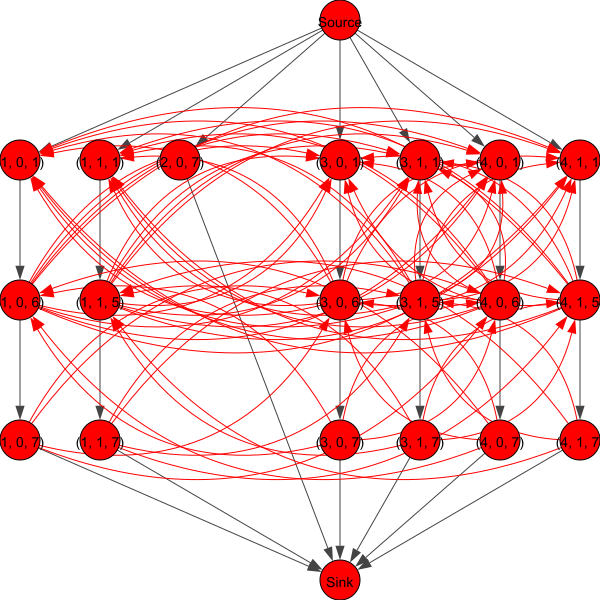

In [14]:
from igraph import Graph, plot

# Define the routes for each train
# routes = {}
# node=1
# for i in range(4):
#     for t in range(3):
#         if t==0:
#             routes[i] = [0,node]
#         else:
#             routes[i].append(node)
#         node+=1
#     routes[i].append(13)
timetable = {}
schedulestart = {}
for k in Newtimetable1:
    if k[2] ==0:
        timetable[k[0],k[1]] ={k[2]:Newtimetable1[k]}
    else:
        timetable[k[0],k[1]][k[2]] = Newtimetable1[k]

label = ["Source"]
layout=[]
layout.append((len(timetable.keys())-1,0))
for t,r in timetable:
    for p,n in enumerate(list(timetable[t,r].keys())[1:-1]):
        label.append((t,r,n)) 
        layout.append((t*2+r,p*2+2))

layout.append((len(timetable.keys())-1,len(timetable[list(timetable.keys())[0]])*2-2))
label.append("Sink")


alternatives1 =[]
alternatives = []
for t,r in timetable:
    rest = timetable.copy()
    rest.pop((t,r))
    for p,n in enumerate(list(timetable[t,r].keys())[1:-2]):
        for tr,rr in rest:
            for pr,nr in enumerate(list(rest[tr,rr].keys())[1:-2]):
                if tr!=t and nr==n:
                    n1 = list(timetable[t,r].keys())[1:-1][p+1]
                    nr1 = list(rest[tr,rr].keys())[1:-1][pr+1]
                    alternatives1.append((t,r,tr,rr,n,n1,nr1))

for arc in alternatives1:
    alternatives.append((label.index((arc[2],arc[3],arc[6])),label.index((arc[0],arc[1],arc[4]))))
    alternatives.append((label.index((arc[0],arc[1],arc[5])),label.index((arc[2],arc[3],arc[4]))))
# fixed = [(label.index((t,r,list(timetable[t,r].keys())[n])),label.index((t,r,list(timetable[t,r].keys())[n+1]))) for t,r in timetable for n in range(len(list(timetable[t,r].keys())))[1:-2]]
fixed = []
for t,r in timetable:
    fixed.append((0,label.index((t,r,list(timetable[t,r].keys())[1]))))
    fixed.append((label.index((t,r,list(timetable[t,r].keys())[len(timetable[t,r].keys())-2])), len(label)-1))
    for n in range(len(list(timetable[t,r].keys())))[1:-2]:
        fixed.append((label.index((t,r,list(timetable[t,r].keys())[n])),label.index((t,r,list(timetable[t,r].keys())[n+1]))))
# Create a directed graph

g = Graph(len(label), fixed ,directed=True)

# # Create a directed graph
# g = Graph(14, fixed ,directed=True)

# for k in alternatives:
#     g.add_edge(k[0],k[1],color = "red")

for k in alternatives:
    g.add_edge(k[0],k[1],color = "red")

# # # print(g)
g.vs["layout"] = layout
g.vs['labels'] = label

plot(g, margin=20,vertex_size =40 , vertex_label = g.vs['labels'], layout = g.vs["layout"])

# plot(g, bbox=(400, 400), margin=20,vertex_label = g.vs['labels'], layout= g.vs["layout"])

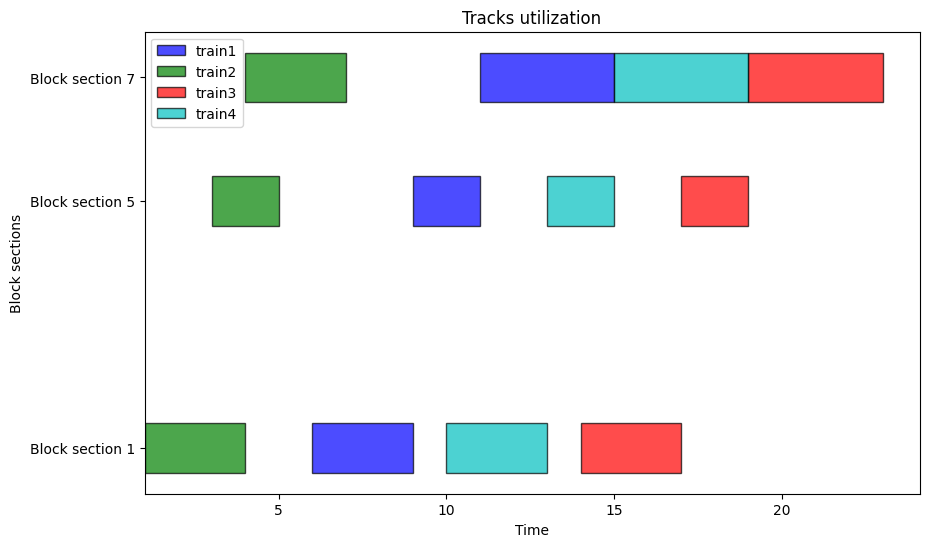

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
timetable = {}
schedulestart = {}
for k in Newtimetable1:
    if Newroutes[k[:2]]>0:
        if k[2] ==0:
            timetable[k[0]] ={k[2]:Newtimetable1[k]}
        else:
            timetable[k[0]][k[2]] = Newtimetable1[k]

# Jobs={f'train{k}': {timetable[k][i]: (Newtimetable[k,timetable[k][i]],Newtimetable[k,timetable[k][i+1]]) for i in range(1,len(timetable[k])-1)} for k in timetable}
for k in timetable:
    route = list(timetable[k].keys())[1:]
    if route[:-1] == list(Jobs[f'train{k}'].keys()) or k == 2:
        for i in range(len(route)-1):
            Jobs[f'train{k}'][route[i]] = (timetable[k][route[i]],timetable[k][route[i+1]])
    else:
        Jobs[f'train{k}'] = {route[i]:(timetable[k][route[i]],timetable[k][route[i+1]]) for i in range(len(route)-1)}
    # Jobs[f'train{k}'][timetable[k][i]] = Newtimetable1[k,timetable[k][i]],Newtimetable1[k,timetable[k][i+1]]+1
        # Jobs[f'train{k}'] = {route[k][i]: (Newtimetable[k,route[k][i]],Newtimetable[k,route[k][i+1]]) for i in range(1,len(route[k])-1)}
# print(Jobs)
# print(Jobs)
# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size


# Set y-axis ticks and labels
# resources = list(Jobs['train1'].keys())
resources = list(set([key for i in Jobs for key in Jobs[i].keys()]))
ax.set_yticks(resources)
ax.set_yticklabels([f'Block section {resource}' for resource in resources])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()